# Symbolic calculations in Julia

`Symbolics.jl` is a computer Algebra System (CAS) for Julia. The symbols are number-like and follow Julia semantics so we can put them into a regular function to get a symbolic counterpart.

Source:
- [Simulating Big Models in Julia with ModelingToolkit @ JuliaCon 2021 Workshop](https://youtu.be/HEVOgSLBzWA).
- [Symbolics.jl](https://github.com/JuliaSymbolics/Symbolics.jl) Github repo and its [docs](https://symbolics.juliasymbolics.org/dev/).

## Caveats about Symbolics.jl

`Symbolics.jl` can only handle *traceble*, *quasi-static* expressions.

Some code is not quasi-static e.g. factorial. The number of operations depends on the input value.

> Use `@register` to make it a primitive function.

Some code is *untraceable* like conditional `if`...`else` statements.

> You can use `ifelse(cond, ex1, ex2)` to make it traceable.

## Basic operations

In [1]:
using Symbolics

In [2]:
# Symbolics
@variables x y

2-element Vector{Num}:
 x
 y

In [3]:
x^2 + y^2

x^2 + y^2

In [4]:
# You can use Latexify.jl to generate latex code
A = [x^2 + y 0 2x
     0       0 2y
     y^2 + x 0 0]

3×3 Matrix{Num}:
 y + x^2  0  2x
       0  0  2y
 x + y^2  0   0

In [5]:
Symbolics.derivative(x^2 + y^2, x)

2x

In [6]:
Symbolics.gradient(x^2 + y^2, [x, y])

2-element Vector{Num}:
 2x
 2y

In [7]:
Symbolics.jacobian([x^2 + y^2; y^2], [x, y])

2×2 Matrix{Num}:
 2x  2y
  0  2y

In [8]:
Symbolics.substitute(sin(x)^2 + 2 + cos(x)^2, Dict(x=>y^2))

2 + cos(y^2)^2 + sin(y^2)^2

In [9]:
Symbolics.substitute(sin(x)^2 + 2 + cos(x)^2, Dict(x=>1.0))

3.0

In [10]:
Symbolics.simplify(sin(x)^2 + 2 + cos(x)^2)

3

In [11]:
# Automatically simplify because it's always true
2x - x

x

In [12]:
ex = x^2 + y^2 + sin(x)

x^2 + y^2 + sin(x)

In [13]:
isequal(2ex, ex + ex)

true

In [14]:
ex / ex

1

In [15]:
x / expm1(x)

x / expm1(x)

## Custom functions

In [16]:
foo(x, y) = x * rand() + y

foo (generic function with 1 method)

Without @register, the `rand()` in `foo()` will be evaulated numerically instead of symbolically.

> By default, new functions are traced to the primitives and the symbolic expressions are written on the primitives. However, we can expand the allowed primitives by registering new functions.

In [17]:
# Bring foo(() into symbolic land
@register foo(x, y)

In [18]:
Symbolics.derivative(foo(hypot(x, y), y), x)

(x*Differential(x)(foo(hypot(x, y), y))) / hypot(x, y)

## More number types

In [19]:
@variables z::Complex

1-element Vector{Complex{Num}}:
 z

In [20]:
@variables xs[1:18]

1-element Vector{Symbolics.Arr{Num, 1}}:
 xs[1:18]

In [21]:
xs[1]

xs[1]

In [22]:
# Lazy representation of summation
sum(xs)

Symbolics._mapreduce(identity, +, xs, Colon(), (:init => false,))

In [23]:
# Explicit vector form
collect(xs)

18-element Vector{Num}:
  xs[1]
  xs[2]
  xs[3]
  xs[4]
  xs[5]
  xs[6]
  xs[7]
  xs[8]
  xs[9]
 xs[10]
 xs[11]
 xs[12]
 xs[13]
 xs[14]
 xs[15]
 xs[16]
 xs[17]
 xs[18]

In [24]:
# Show explicit formulae
sum(collect(xs))

xs[1] + xs[2] + xs[3] + xs[4] + xs[5] + xs[6] + xs[7] + xs[8] + xs[9] + xs[10] + xs[11] + xs[12] + xs[13] + xs[14] + xs[15] + xs[16] + xs[17] + xs[18]

## Example: Rosenbrock function

Wikipedia: <https://en.wikipedia.org/wiki/Rosenbrock_function>

In [25]:
# The vector form of Rosenbrock function
rosenbrock(xs) = sum( 1:length(xs)-1) do i
    100*(xs[i+1] - xs[i]^2)^2 + (1 - xs[i])^2
end

rosenbrock (generic function with 1 method)

In [26]:
# Minimum when xs are all one's
rosenbrock(ones(100))

0.0

In [27]:
N = 100
@variables xs[1:N]

1-element Vector{Symbolics.Arr{Num, 1}}:
 xs[1:100]

In [28]:
# A long list of vector components
xs = collect(xs)

100-element Vector{Num}:
   xs[1]
   xs[2]
   xs[3]
   xs[4]
   xs[5]
   xs[6]
   xs[7]
   xs[8]
   xs[9]
  xs[10]
  xs[11]
  xs[12]
  xs[13]
       ⋮
  xs[89]
  xs[90]
  xs[91]
  xs[92]
  xs[93]
  xs[94]
  xs[95]
  xs[96]
  xs[97]
  xs[98]
  xs[99]
 xs[100]

In [29]:
rxs = rosenbrock(xs)

100((xs[2] - (xs[1]^2))^2) + 100((xs[3] - (xs[2]^2))^2) + 100((xs[4] - (xs[3]^2))^2) + 100((xs[5] - (xs[4]^2))^2) + 100((xs[6] - (xs[5]^2))^2) + 100((xs[7] - (xs[6]^2))^2) + 100((xs[8] - (xs[7]^2))^2) + 100((xs[9] - (xs[8]^2))^2) + 100((xs[10] - (xs[9]^2))^2) + 100((xs[11] - (xs[10]^2))^2) + 100((xs[12] - (xs[11]^2))^2) + 100((xs[13] - (xs[12]^2))^2) + 100((xs[14] - (xs[13]^2))^2) + 100((xs[15] - (xs[14]^2))^2) + 100((xs[16] - (xs[15]^2))^2) + 100((xs[17] - (xs[16]^2))^2) + 100((xs[18] - (xs[17]^2))^2) + 100((xs[19] - (xs[18]^2))^2) + 100((xs[20] - (xs[19]^2))^2) + 100((xs[21] - (xs[20]^2))^2) + 100((xs[22] - (xs[21]^2))^2) + 100((xs[23] - (xs[22]^2))^2) + 100((xs[24] - (xs[23]^2))^2) + 100((xs[25] - (xs[24]^2))^2) + 100((xs[26] - (xs[25]^2))^2) + 100((xs[27] - (xs[26]^2))^2) + 100((xs[28] - (xs[27]^2))^2) + 100((xs[29] - (xs[28]^2))^2) + 100((xs[30] - (xs[29]^2))^2) + 100((xs[31] - (xs[30]^2))^2) + 100((xs[32] - (xs[31]^2))^2) + 100((xs[33] - (xs[32]^2))^2) + 100((xs[34] - (xs[33]^2))

In [30]:
grad = Symbolics.gradient(rxs, xs)

100-element Vector{Num}:
                        2xs[1] - 2 - 200(2xs[2] - 2(xs[1]^2))*xs[1]
       202xs[2] - 2 - 200(xs[1]^2) - 200(2xs[3] - 2(xs[2]^2))*xs[2]
       202xs[3] - 2 - 200(xs[2]^2) - 200(2xs[4] - 2(xs[3]^2))*xs[3]
       202xs[4] - 2 - 200(xs[3]^2) - 200(2xs[5] - 2(xs[4]^2))*xs[4]
       202xs[5] - 2 - 200(xs[4]^2) - 200(2xs[6] - 2(xs[5]^2))*xs[5]
       202xs[6] - 2 - 200(xs[5]^2) - 200(2xs[7] - 2(xs[6]^2))*xs[6]
       202xs[7] - 2 - 200(xs[6]^2) - 200(2xs[8] - 2(xs[7]^2))*xs[7]
       202xs[8] - 2 - 200(xs[7]^2) - 200(2xs[9] - 2(xs[8]^2))*xs[8]
      202xs[9] - 2 - 200(xs[8]^2) - 200(2xs[10] - 2(xs[9]^2))*xs[9]
   202xs[10] - 2 - 200(xs[9]^2) - 200(2xs[11] - 2(xs[10]^2))*xs[10]
  202xs[11] - 2 - 200(xs[10]^2) - 200(2xs[12] - 2(xs[11]^2))*xs[11]
  202xs[12] - 2 - 200(xs[11]^2) - 200(2xs[13] - 2(xs[12]^2))*xs[12]
  202xs[13] - 2 - 200(xs[12]^2) - 200(2xs[14] - 2(xs[13]^2))*xs[13]
                                                                  ⋮
  202xs[89] - 2 - 200(x

In [31]:
# hes = Symbolics.jacobian(grad, xs)
hes = Symbolics.hessian(rxs, xs)

100×100 Matrix{Num}:
 2 + 1200(xs[1]^2) - 400xs[2]                       -400xs[1]  …           0
                    -400xs[1]  202 + 1200(xs[2]^2) - 400xs[3]              0
                            0                       -400xs[2]              0
                            0                               0              0
                            0                               0              0
                            0                               0  …           0
                            0                               0              0
                            0                               0              0
                            0                               0              0
                            0                               0              0
                            0                               0  …           0
                            0                               0              0
                            0                          

In [32]:
isequal(Symbolics.hessian(rxs, xs), Symbolics.jacobian(grad, xs))

true

## Sparse matrix

In [33]:
# Sparse Hessian matrix of the Hessian matrix of the Rosenbrock function w.r.t. to vector components.
# (298 non-zero values out of 10000 elements)
hes_sp = Symbolics.hessian_sparsity(rxs, xs)

100×100 SparseArrays.SparseMatrixCSC{Bool, Int64} with 298 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦

Visualize sparse matrix using `Plots.spy()`

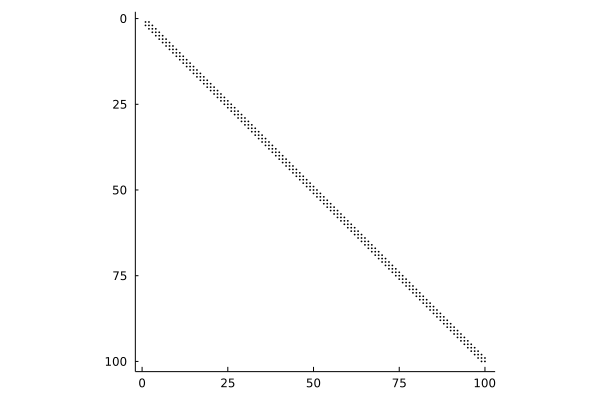

In [34]:
# Visualizing sparse matrix using Plots.spy()
using Plots
spy(hes_sp)

In [35]:
using BenchmarkTools
@benchmark Symbolics.hessian($rxs, $xs)

BenchmarkTools.Trial: 8 samples with 1 evaluation.
 Range (min … max):  661.164 ms … 693.985 ms  ┊ GC (min … max): 3.92% … 5.72%
 Time  (median):     680.813 ms               ┊ GC (median):    4.94%
 Time  (mean ± σ):   678.904 ms ±  10.779 ms  ┊ GC (mean ± σ):  4.91% ± 1.01%

  █         █                 █  █         █ █   █            █  
  █▁▁▁▁▁▁▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁█▁▁█▁▁▁▁▁▁▁▁▁█▁█▁▁▁█▁▁▁▁▁▁▁▁▁▁▁▁█ ▁
  661 ms           Histogram: frequency by time          694 ms <

 Memory estimate: 160.28 MiB, allocs estimate: 4330310.

In [36]:
# Sparse is faster
@benchmark Symbolics.hessian_sparsity($rxs, $xs)

BenchmarkTools.Trial: 439 samples with 1 evaluation.
 Range (min … max):   9.538 ms … 27.689 ms  ┊ GC (min … max): 0.00% …  0.00%
 Time  (median):     10.220 ms              ┊ GC (median):    0.00%
 Time  (mean ± σ):   11.375 ms ±  3.346 ms  ┊ GC (mean ± σ):  8.48% ± 14.25%

  ▂▆█▇▅▄▂ ▁                                          ▁         
  ███████▇█▇▆▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▅▅██▇▇▄▇▆▅▄ ▇
  9.54 ms      Histogram: log(frequency) by time      22.5 ms <

 Memory estimate: 6.06 MiB, allocs estimate: 126901.

## Generating functions

- `build_function(ex, args...)` generates out-of-place (oop) and in-place (ip) function expressions in a pair.
- `build_function(ex, args..., parallel=Symbolics.MultithreadedForm())` generates a parallel algorithm to evaluate the output. See the [example](https://symbolics.juliasymbolics.org/dev/tutorials/symbolic_functions/#Building-Non-Allocating-Parallel-Functions-for-Sparse-Matrices-1) in the official docs. **However**, there is [an issue](https://github.com/JuliaSymbolics/Symbolics.jl/issues/136) blocking it from happending.
- `build_function(ex, args..., target=Symbolics.CTarget())` generates a C function from Julia.

In [37]:
fexprs = build_function(grad, xs);

In [38]:
foop = eval(fexprs[1])

#29 (generic function with 1 method)

In [39]:
fip = eval(fexprs[2])

#31 (generic function with 1 method)

In [40]:
inxs = rand(N)
out = similar(inxs);

In [41]:
fip(out, inxs)  # The inplace version returns nothing. The results are stored in out.

In [42]:
foop(inxs)

100-element Vector{Float64}:
   80.65615625055672
  -53.906439564062055
   25.414059738305852
  -33.096389267842085
   30.693013863891018
   17.63983174445427
   25.874022598983707
  -39.38636362650162
   26.678917944854796
  -76.04318656742313
  376.91073659539603
 -160.19207442404434
  212.9037737337025
    ⋮
  -54.35735235106788
   13.13187244513503
   90.6531931182862
 -101.1423209644311
   54.315276384803475
   84.44470157123254
  -87.95515481336793
  417.26882953620685
 -152.44710756165853
   93.5004676231119
  -39.64868296113883
  112.76890392885836

In [43]:
# Check answers
foop(inxs) ≈ out

true

In [44]:
# Save the generated function for later use
# write("function.jl", string(fexprs[2]))

We can use another package `ForwardDiff.jl` to make sure our gradient from `Symbolics.jl` is correct.

In [45]:
using ForwardDiff
ForwardDiff.gradient(rosenbrock, inxs) ≈ out

true

In [46]:
# Sparce Hessian matrix
# Only non-zero expressions are calculated
hexprs = build_function(hes_sp, xs);

In [47]:
hoop = eval(hexprs[1])
hip = eval(hexprs[2])

#35 (generic function with 1 method)

In [48]:
hoop(rand(N))

100×100 SparseArrays.SparseMatrixCSC{Bool, Int64} with 298 stored entries:
⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠻⣦